In [38]:
# notwendige Bibliotheken importieren
import pandas as pd
# Configure display options
pd.set_option("display.max_columns", None)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
#%matplotlib
import seaborn as sns
sns.set_theme(style="whitegrid")
from datetime import datetime
from dateutil import tz

In [39]:
# Trainingsdaten in einer Dataframme einlesen
Flug_df = pd.read_csv("./datensets/train_set.csv")
Flug_df

,index,Request_Date,Flight_Date,Departure_hour,flight_unique_id,route_abb,Price_In_Eur,min_future_price_in_Eur,buy
0,1,2019-06-03T11:00:00Z,2019-06-05,19,2019-06-05 FR 146,SXF-STN,208.07,259.07,1
1,2,2019-06-03T23:00:00Z,2019-06-05,19,2019-06-05 FR 146,SXF-STN,259.07,259.07,1
2,3,2019-06-04T11:00:00Z,2019-06-05,19,2019-06-05 FR 146,SXF-STN,259.07,259.07,1
3,4,2019-06-04T23:00:00Z,2019-06-05,19,2019-06-05 FR 146,SXF-STN,259.07,259.07,1
4,5,2019-06-03T11:00:00Z,2019-06-05,21,2019-06-05 FR 147,STN-SXF,143.86,251.72,1
...,...,...,...,...,...,...,...,...,...
83619,83620,2019-08-01T11:00:00Z,2019-09-10,10,2019-09-10 FR 8543,SXF-STN,35.69,39.69,1
83620,83621,2019-08-01T23:00:00Z,2019-09-10,10,2019-09-10 FR 8543,SXF-STN,46.83,39.69,0
83621,83622,2019-08-02T11:00:00Z,2019-09-10,10,2019-09-10 FR 8543,SXF-STN,46.83,39.69,0
83622,83623,2019-08-02T23:00:00Z,2019-09-10,10,2019-09-10 FR 8543,SXF-STN,39.69,39.69,1


# **Deskriptive Datenanalyse**

In [3]:
# Die fünf ersten Objekte ausgeben
Flug_df.head(5)

,index,Request_Date,Flight_Date,Departure_hour,flight_unique_id,route_abb,Price_In_Eur,min_future_price_in_Eur,buy
0,1,2019-06-03T11:00:00Z,2019-06-05,19,2019-06-05 FR 146,SXF-STN,208.07,259.07,1
1,2,2019-06-03T23:00:00Z,2019-06-05,19,2019-06-05 FR 146,SXF-STN,259.07,259.07,1
2,3,2019-06-04T11:00:00Z,2019-06-05,19,2019-06-05 FR 146,SXF-STN,259.07,259.07,1
3,4,2019-06-04T23:00:00Z,2019-06-05,19,2019-06-05 FR 146,SXF-STN,259.07,259.07,1
4,5,2019-06-03T11:00:00Z,2019-06-05,21,2019-06-05 FR 147,STN-SXF,143.86,251.72,1


In [4]:
# Informationen über den DataFrame einschließlich Indexdatentyps und  Spalten, 
# Nicht-Null-Werte und der Speichernutzung ausgeben.
print(Flug_df.shape,'\n')
print(Flug_df.info())



(83624, 9) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83624 entries, 0 to 83623
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    83624 non-null  int64  
 1   Request_Date             83624 non-null  object 
 2   Flight_Date              83624 non-null  object 
 3   Departure_hour           83624 non-null  int64  
 4   flight_unique_id         83624 non-null  object 
 5   route_abb                83624 non-null  object 
 6   Price_In_Eur             83624 non-null  float64
 7   min_future_price_in_Eur  83624 non-null  float64
 8   buy                      83624 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 5.7+ MB
None


#### Die Daten bestehen aus 8 Features(Spalten)  und 83624 Exemplare (Zeilen). Davon sind 4 Spalten vom Datentyp "object", was mit String gleichzusetzen ist: Request_date, Flight_date, flight_unique_id und route_abb. Die Spalten Departure_hour und buy enthalten ganze Zahlen vom Typ int64 und die Spalten Price_In_Eur und min_future_price_in_Eur gleitkomma Zahlen vom Typ float64.


Anzahl fehlende Werte pro Spalten

index                      0
Request_Date               0
Flight_Date                0
Departure_hour             0
flight_unique_id           0
route_abb                  0
Price_In_Eur               0
min_future_price_in_Eur    0
buy                        0
dtype: int64



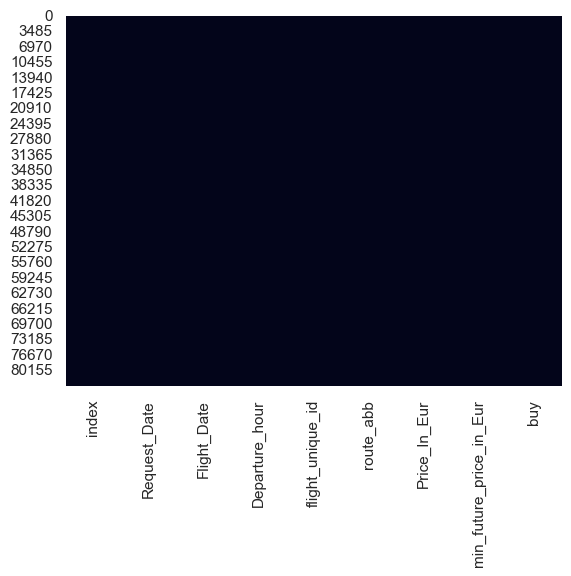

In [5]:
print(f"Anzahl fehlende Werte pro Spalten\n\n{Flug_df.isnull().sum()}\n")
sns.heatmap(Flug_df.isnull(), cbar=False)
plt.show()

#### Aus der Ausgabe ist  zu sehen, dass keine Spalte "Null-Werte" enthält. wenn denn hätten wir in der Grafik weiße Stellen gehabt. Mit Null-Werten sind fehlende Werte gemeint.

In [14]:
# Statistiken für numerische Spalten generieren 
print(Flug_df.describe().T, '\n\n')
## Statistiken für Spalten mit Zeichenfolge  generieren 
print(Flug_df.describe(include='O').T)



                           count          mean           std   min       25%  \
index                    83624.0  41812.500000  24140.313792  1.00  20906.75   
Departure_hour           83624.0     12.969889      6.177936  6.00      7.00   
Price_In_Eur             83624.0     71.965080     54.788483  8.99     32.77   
min_future_price_in_Eur  83624.0     56.593014     46.126909  8.99     22.27   

                              50%       75%       max  
index                    41812.50  62718.25  83624.00  
Departure_hour              10.00     19.00     22.00  
Price_In_Eur                55.08     91.79    372.96  
min_future_price_in_Eur     41.89     73.43    311.09   


                  count unique                 top   freq
flight_unique_id  83624   1007  2019-09-10 FR 8543    123
route_abb         83624      4             SXF-STN  27592


#### Mithilfe der Funktion "describe()" werden unterschiedliche statistische Werte ( Lage- und Streuungsparameter) für alle Spalten berechnet. Je nachdem ob der Spalte numerische Werte oder Zeichenfolge enthält wechseln die Parameter ab.
#### Für numerische Werte werden Anzahl(count), durschnittliche Mittelwert(mean), Standardabweichung(std), Minimum(min), Maximum(max) und Percentiles(25%,50% und 75%) berechnet.

#### Für Zeichenfolge werden hingegen Anzahl(count), Anzahl eindeutige Werte(unique), häufigste Wert(top) und wie oft dieser Wert in den Daten vorkommt(freq) berechnet.

#### Nachfolgend werden die Wertebereiche für die numerische Spalten mit Boxplots veranschaulicht 

,index,Request_Date,Flight_Date,Departure_hour,flight_unique_id,route_abb,Price_In_Eur,min_future_price_in_Eur,buy
0,1,2019-06-03T11:00:00Z,2019-06-05,19,2019-06-05 FR 146,SXF-STN,208.07,259.07,1


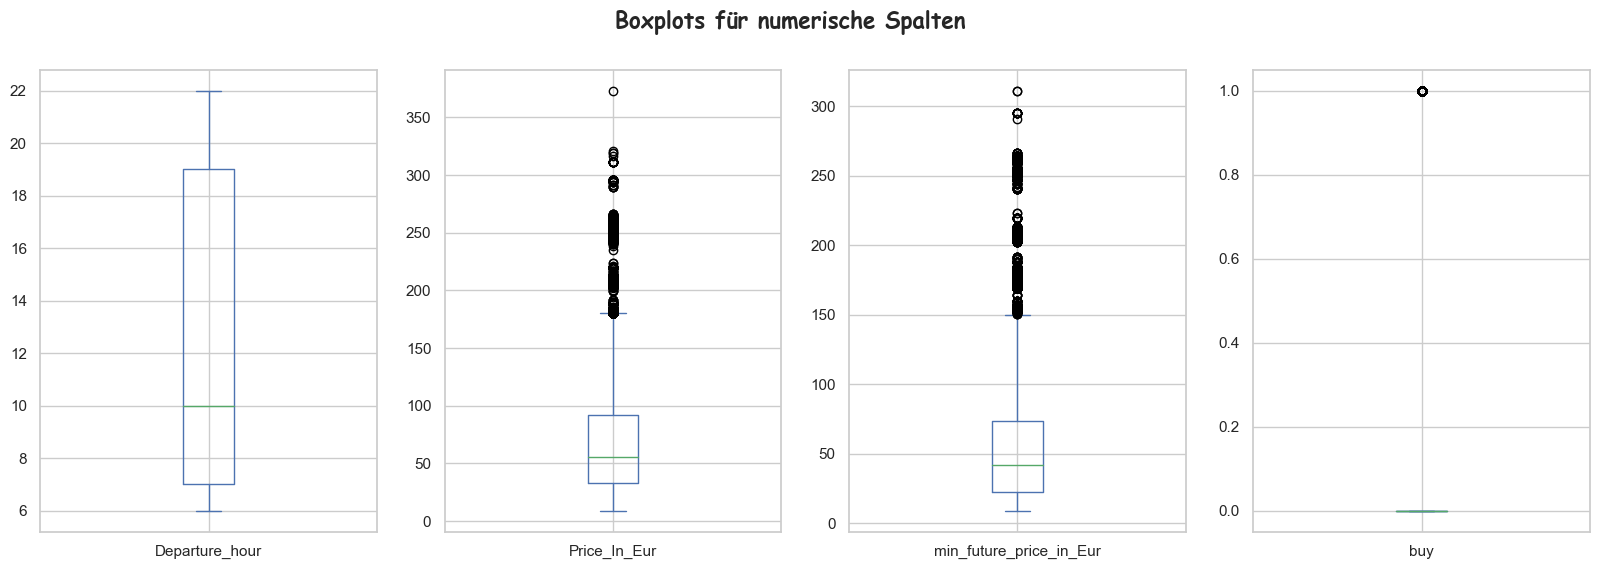

In [7]:
fig,axes = plt.subplots(nrows=1,ncols=4,figsize=(20,6))
font = font_manager.FontProperties(family='Comic Sans MS',
                                   weight='bold',
                                   style='normal', size=16)
fig.suptitle(t='Boxplots für numerische Spalten',fontproperties=font)

def Num_Spalten_visuals(dataframe):
    cols = dataframe.columns
    new_col = []
    for col in cols:
        if (dataframe[col].dtypes == 'int64' or dataframe[col].dtypes == 'float64') and (col != 'index'):
            new_col.append(col)
    dataframe[new_col].plot(subplots=True, ax=axes,kind='box')
        

Num_Spalten_visuals(Flug_df)

Flug_df.head(1)

#### Aus dem obigen Diagramm können wir ableiten, dass dieSpalten "Price_in_Eur" und "min_future_price_in_Eur" Ausreißer enthalten. Die Ausreißer liegennach dem Wert "150" für min_future_price_in_Eur und nach ca "180" für Price_In_Eur".
#### Die Abflüge finden von 6 Uhr bis 22 Uhr statt. Für alle Abfragen gilt: Der günstigste Flug kostet 8,99 € und der teuerste 372,96

In [26]:
# Let's get the count values of the data corresponding to those outliers in each feature:
print ("'Price' feature Outliers:", Flug_df[Flug_df['Price_In_Eur']>180].count(), sep = '\n')
print ("\n\n'min_future_price' feature Outliers:", Flug_df[Flug_df['min_future_price_in_Eur']>150].count(), sep = '\n')

'Price' feature Outliers:
index                      4881
Request_Date               4881
Flight_Date                4881
Departure_hour             4881
flight_unique_id           4881
route_abb                  4881
Price_In_Eur               4881
min_future_price_in_Eur    4881
buy                        4881
dtype: int64


'min_future_price' feature Outliers:
index                      4300
Request_Date               4300
Flight_Date                4300
Departure_hour             4300
flight_unique_id           4300
route_abb                  4300
Price_In_Eur               4300
min_future_price_in_Eur    4300
buy                        4300
dtype: int64


Wir stellen fest, dass es in jedem Merkmal nur 4881 Beobachtungen gibt, die den Ausreißer-Beobachtungen des Merkmals "Price" entsprechen und 4300 die des Merkmals "min_future_price_in_Eur"; wir wollen nun den Prozentsatz dieser Beobachtungen (Zeilen) ermitteln:

In [33]:
print("'Price'", round(4881/Flug_df.shape[0]*100,2),"Prozent")
print("'min_future_price'",round(4300/Flug_df.shape[0]*100,2),"Prozent")

'Price' 5.84 Prozent
'min_future_price' 5.14 Prozent


### Datentypkonvertierung

Wenn wir die Daten, die in den Spalten vorkommen mit ihren Datentypen vergleichen,stellt man fest, dass einige Feautures nicht der richtige Datentyp haben.Zum Beispiel 'Buy' hier ist die vorherzusagende Klasse, deswegen sollte der Feature vom Datentyp 'Category'sein. 
Die Feautures 'Request_Date'und 'Flight_Date' sollten vom Datentyp 'datetime' sein. Der Feature 'Request_Date' ist im UTC-Format gespeichert, Deswegen muss er erstmal in Localen Format umkonvertiert werden.

In [41]:


def Spalten_Konvertierung(dataset):
    dataset['buy']= dataset['buy'].astype('category')
    dataset['Flight_Date']= pd.to_datetime(dataset['Flight_Date'])

def local_time(row):
    if row['route_abb'].split('-')[0] == 'SXF' or row['route_abb'].split('-')[0] == 'FRA':
        # Zeitzone
        zone = "Europe/Berlin"
    else:
        # Zeitzone
        zone = "Europe/London"
    
    # Konvertierung in ein datetime-Objekt
    dtUTC = datetime.strptime(row['Request_Date'], '%Y-%m-%dT%H:%M:%SZ')
    dtZone = dtUTC.replace(tzinfo=tz.gettz('UTC')).astimezone(tz.gettz(zone))
    
    # Formatierung des DateTime-Strings ohne Zeitzonen-Offset-Information
    dtString = dtZone.strftime('%Y-%m-%d %H:%M:%S')
    
    # Rückgabe des konvertierten Werts
    return pd.to_datetime(dtString)

# Anwendung der Funktion auf die Spalte 'Request_Date'
Flug_df['Request_Date'] = Flug_df.apply( local_time, axis=1)
# Anwendung der Funktion auf der Dataframe'
Spalten_Konvertierung(Flug_df)        

    
print(f"Datentyp von Features nach Konvertierung \n\n{Flug_df.dtypes}")
Flug_df.head()



Datentyp von Features nach Konvertierung 

index                               int64
Request_Date               datetime64[ns]
Flight_Date                datetime64[ns]
Departure_hour                      int64
flight_unique_id                   object
route_abb                          object
Price_In_Eur                      float64
min_future_price_in_Eur           float64
buy                              category
dtype: object


,index,Request_Date,Flight_Date,Departure_hour,flight_unique_id,route_abb,Price_In_Eur,min_future_price_in_Eur,buy
0,1,2019-06-03 13:00:00,2019-06-05,19,2019-06-05 FR 146,SXF-STN,208.07,259.07,1
1,2,2019-06-04 01:00:00,2019-06-05,19,2019-06-05 FR 146,SXF-STN,259.07,259.07,1
2,3,2019-06-04 13:00:00,2019-06-05,19,2019-06-05 FR 146,SXF-STN,259.07,259.07,1
3,4,2019-06-05 01:00:00,2019-06-05,19,2019-06-05 FR 146,SXF-STN,259.07,259.07,1
4,5,2019-06-03 12:00:00,2019-06-05,21,2019-06-05 FR 147,STN-SXF,143.86,251.72,1


### Korrelationen

                         flight_unique_id  route_abb       buy  \
flight_unique_id                 1.000000   0.006370  0.127633   
route_abb                        0.006370   1.000000  0.066408   
buy                              0.127633   0.066408  1.000000   
Departure_hour                   0.004676  -0.053954  0.000522   
Price_In_Eur                    -0.391303  -0.091739  0.038199   
min_future_price_in_Eur         -0.416027  -0.080440 -0.197882   

                         Departure_hour  Price_In_Eur  min_future_price_in_Eur  
flight_unique_id               0.004676     -0.391303                -0.416027  
route_abb                     -0.053954     -0.091739                -0.080440  
buy                            0.000522      0.038199                -0.197882  
Departure_hour                 1.000000      0.092180                 0.083496  
Price_In_Eur                   0.092180      1.000000                 0.894554  
min_future_price_in_Eur        0.083496      0.8945

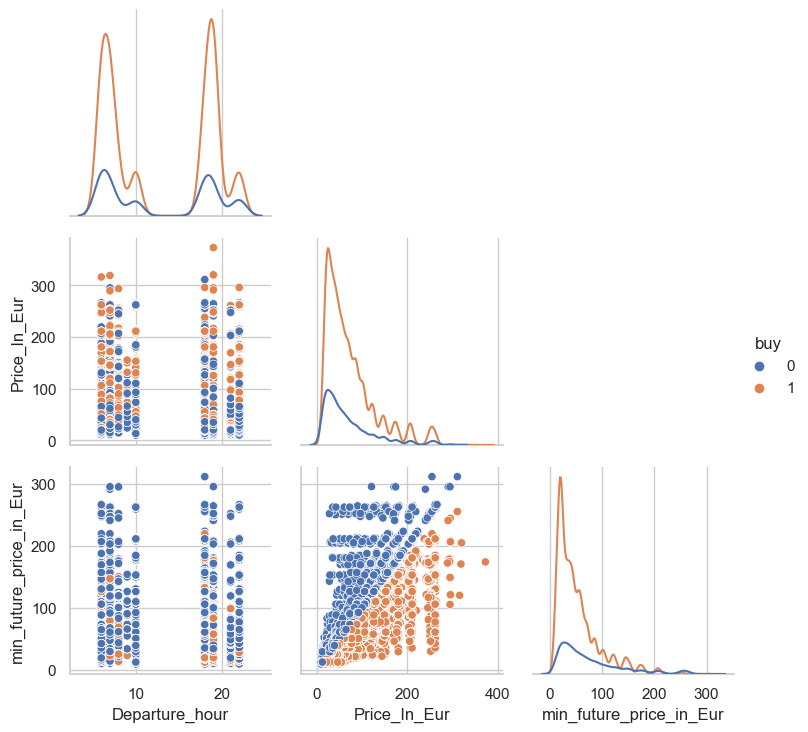

In [35]:
colcat = ['flight_unique_id', 'route_abb',  'buy']
colnum = ['Departure_hour','Price_In_Eur','min_future_price_in_Eur']

#Erstellung numerischer Darstellungen von kategorialen Variablen
df = Flug_df[colcat].apply(lambda x : pd.factorize(x)[0])
df= pd.concat([df,Flug_df[colnum]], axis=1)                           
# Berechnung der Korrelationsmatrix
corrmat=df.corr(method='pearson')
print(corrmat)


#g = sns.PairGrid(df, diag_sharey=False,corner=True, vars= ['Departure_hour','Price_In_Eur','min_future_price_in_Eur'], hue='buy')
#g.map_lower(sns.scatterplot)
#g.map_diag(sns.kdeplot)
#g.add_legend()
#plt.show()

#### Zwischen Price_In_Eur und min_future_price_in_Eur besteht eine starke positive Koorelation.

# explorative Datenanalyse

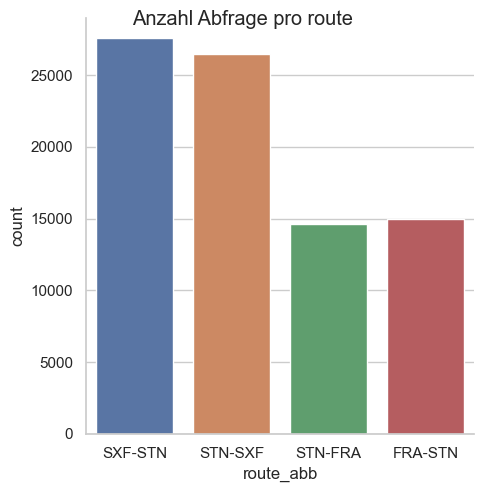

In [10]:
cp = sns.catplot(x='route_abb', data=Flug_df,kind='count')
cp.fig.suptitle('Anzahl Abfrage pro route')
plt.show()


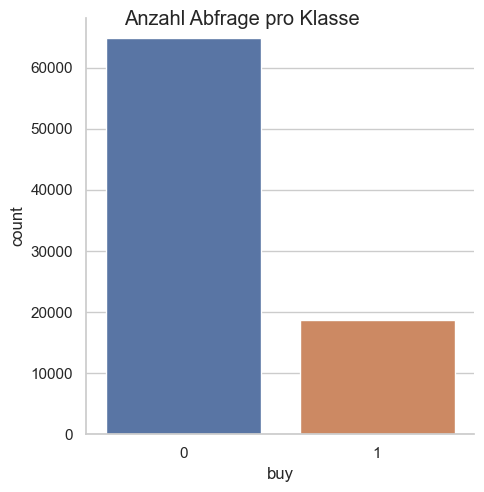

In [88]:
ck=sns.catplot(x='buy', data=Flug_df,kind='count')
ck.fig.suptitle('Anzahl Abfrage pro Klasse')
plt.show()

#### Dadurch stellt man fest das der Datensatz unbalanciert ist. Wir haben  64906 warten und nur 18718 kaufen. Was uns schon der Hinweis gibt dass, bei Aufteilen in Trainings- und Validierungsset Stratifizierung verwenden sollten.

In [12]:
route_SXF_STN = Flug_df.loc[Flug_df['route_abb'] =='SXF-STN', 'Price_In_Eur']
route_STN_SXF= Flug_df.loc[Flug_df['route_abb'] =='STN-SXF', 'Price_In_Eur']
route_STN_FRA = Flug_df.loc[Flug_df['route_abb'] =='STN-FRA', 'Price_In_Eur']
route_FRA_STN = Flug_df.loc[Flug_df['route_abb'] =='FRA-STN', 'Price_In_Eur']
print("Der Mittelpreis liegt bei {}".format(round(route_SXF_STN.mean(), 2)), "wenn man der Preis von Berlin nach London abfragt")
print("Der Mittelpreis liegt bei {}".format(round(route_STN_SXF.mean(), 2)), "wenn man der Preis von London nach Berlin  abfragt")
print("Der Mittelpreis liegt bei {}".format(round(route_STN_FRA.mean(), 2)), "wenn man der Preis von London nach Frankfurt  abfragt")
print("Der Mittelpreis liegt bei {}".format(round(route_FRA_STN.mean(), 2)), "wenn man der Preis von Frankfurt nach London abfragt")

Der Mittelpreis liegt bei 74.79 wenn man der Preis von Berlin nach London abfragt
Der Mittelpreis liegt bei 77.38 wenn man der Preis von London nach Berlin  abfragt
Der Mittelpreis liegt bei 67.57 wenn man der Preis von London nach Frankfurt  abfragt
Der Mittelpreis liegt bei 61.45 wenn man der Preis von Frankfurt nach London abfragt


#### Das würde bedeuten es ist güngstiger in Richtung London der Flugticket von Frankfurt zu buchen und für die Rückreise nach Berlin ist es auch günstiger in Frankfurt zu landen

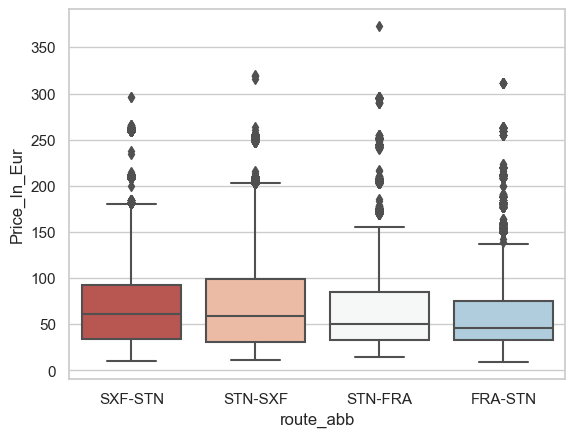

In [91]:
sns.boxplot(x = 'route_abb', y =Flug_df['Price_In_Eur'], data = Flug_df, palette = sns.color_palette('RdBu',5))
plt.show()

## Feature ingeneering

In [99]:
def neue_features(dataframe):
    dataframe['Request_date'] = dataframe['Request_Date'].dt.date
    dataframe['Request_time'] = dataframe['Request_Date'].dt.time
    dataframe['days_diff'] = (pd.to_datetime(dataframe['Flight_Date'])- pd.to_datetime(dataframe['Request_date'])).dt.days
    dataframe['flight_day'] = dataframe['Flight_Date'].dt.dayofweek
    # Umrechnung der Departure_hour in Vormittag/Nachmittag/Abend usw.
    s = (dataframe["Departure_hour"] % 24 + 4) // 4 #give numbers from 1 to 6 #(return a series)
# to replace values 1:latenight to 6: night
    s.replace({1: 'Late Night', 2: 'Early Morning', 3: 'Morning', 
                      4: 'Afternoon', 5: 'Evening', 6: 'Night'} ,inplace = True) 
    dataframe["departure_time"] = s
    dataframe['source'] =''
    dataframe['destination'] =''

    unique_routes = dataframe['route_abb'].unique()

    for route in unique_routes:
        if route == 'SXF-STN':
            dataframe.loc[dataframe['route_abb'] == route, 'source'] = 'Berlin'
            dataframe.loc[dataframe['route_abb'] == route, 'destination'] = 'London'
        elif route == 'STN-SXF':  # Weitere Ausprägungen hinzufügen
            dataframe.loc[dataframe['route_abb'] == route, 'source'] = 'London'
            dataframe.loc[dataframe['route_abb'] == route, 'destination'] = 'Berlin'
        elif route == 'STN-FRA':  # Weitere Ausprägungen hinzufügen
            dataframe.loc[dataframe['route_abb'] == route, 'source'] = 'London'
            dataframe.loc[dataframe['route_abb'] == route, 'destination'] = 'Frankfurt'
        elif route == 'FRA-STN':  # Weitere Ausprägungen hinzufügen
            dataframe.loc[dataframe['route_abb'] == route, 'source'] = 'Frankfurt'
            dataframe.loc[dataframe['route_abb'] == route, 'destination'] = 'London'

            
neue_features(Flug_df)

In [100]:
# Features, die zur Erstellung neue Features genutzt wurden, 
#werden gelöscht, um Multikolinearität zu vermeiden

drop_cols = ['Request_Date','Departure_hour','route_abb',]

In [101]:
Flug_df.head(20)


,index,Request_Date,Flight_Date,Departure_hour,flight_unique_id,route_abb,Price_In_Eur,min_future_price_in_Eur,buy,Request_date,Request_time,days_Request_flight,days_diff,departure_time,source,destination,flight_day
0,1,2019-06-03 13:00:00,2019-06-05,19,2019-06-05 FR 146,SXF-STN,208.07,259.07,1,2019-06-03,13:00:00,1,2,Evening,Berlin,London,2
1,2,2019-06-04 01:00:00,2019-06-05,19,2019-06-05 FR 146,SXF-STN,259.07,259.07,1,2019-06-04,01:00:00,0,1,Evening,Berlin,London,2
2,3,2019-06-04 13:00:00,2019-06-05,19,2019-06-05 FR 146,SXF-STN,259.07,259.07,1,2019-06-04,13:00:00,0,1,Evening,Berlin,London,2
3,4,2019-06-05 01:00:00,2019-06-05,19,2019-06-05 FR 146,SXF-STN,259.07,259.07,1,2019-06-05,01:00:00,-1,0,Evening,Berlin,London,2
4,5,2019-06-03 12:00:00,2019-06-05,21,2019-06-05 FR 147,STN-SXF,143.86,251.72,1,2019-06-03,12:00:00,1,2,Night,London,Berlin,2
5,6,2019-06-04 00:00:00,2019-06-05,21,2019-06-05 FR 147,STN-SXF,252.06,251.72,0,2019-06-04,00:00:00,1,1,Night,London,Berlin,2
6,7,2019-06-04 12:00:00,2019-06-05,21,2019-06-05 FR 147,STN-SXF,251.72,251.72,1,2019-06-04,12:00:00,0,1,Night,London,Berlin,2
7,8,2019-06-05 00:00:00,2019-06-05,21,2019-06-05 FR 147,STN-SXF,251.72,251.72,1,2019-06-05,00:00:00,0,0,Night,London,Berlin,2
8,9,2019-06-03 13:00:00,2019-06-05,22,2019-06-05 FR 8545,SXF-STN,22.17,22.17,1,2019-06-03,13:00:00,1,2,Night,Berlin,London,2
9,10,2019-06-04 01:00:00,2019-06-05,22,2019-06-05 FR 8545,SXF-STN,22.17,28.55,1,2019-06-04,01:00:00,0,1,Night,Berlin,London,2
